In [1]:
import folium
import main



Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-04


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-7267U CPU @ 3.10GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1572 rows, 177 columns and 6804 nonzeros
Model fingerprint: 0xdb7499a5
Model has 592 quadratic constraints
Variable types: 24 continuous, 153 integer (153 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e-03, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+02]

MIP start from previous solve produced solution with objective 4 (0.02s)
Loaded MIP start from previous solve with objective 4

Presolve removed 1314 rows and 46 columns
Presolve time: 0.02s
Presolved: 258 rows, 131 columns, 1772 nonzeros
Variable types: 22 continuous, 109 integer (109 binary)

Root relaxation: objective 5.000000e+00, 71 iterations, 0.00 seconds (0.00 work units)

    Nodes 

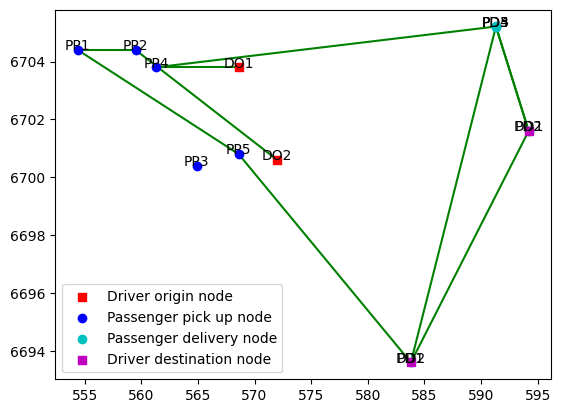

{0: 5, 5: 10, 10: 12}
{1: 3, 2: 6, 3: 2, 6: 7, 7: 11, 8: 13, 11: 8}
mais
{0: [(60.383170751479454, 5.121553579953343), (60.383170751479454, 5.055800254005998), (60.3958710514227, 5.326109474784049), (60.363354680646005, 5.352140586015259)], 1: [(60.354347375721716, 5.15217841669594), (60.38857513443402, 5.03958710514227), (60.38857513443402, 4.993649850028373), (60.35614883670657, 5.121553579953343), (60.29129624125166, 5.258464614802604), (60.39588005872763, 5.326118482088974), (60.363354680646005, 5.352140586015259), (60.29129624125166, 5.258464614802604)]}


In [5]:
arcs = main.run_only_once()
print("mais")


m = folium.Map(location=[60.355, 5.21], zoom_start=12)

def get_coordinates():

    result = {}
    for driver in arcs:
        visitation_sequence=[]
        for arc in arcs[driver]:
            if arc[0] not in visitation_sequence:
                visitation_sequence.append(arc[0])
            if arc[1] not in visitation_sequence:
                visitation_sequence.append(arc[1])

        driver_origin = []
        driver_destination = []
        passenger_pickup = []
        passenger_delivery = []

    
        for node in visitation_sequence:
            
            driver_origin_nr = 1
            driver_destination_nr = 1

            if node in main.D:
                for d in main.drivers_json:
                    if main.drivers_json[d]['id'] == node:
                        driver_origin.append(
                            (main.drivers_json[d]['origin_yc']/111.021, main.drivers_json[d]['origin_xc']/111.021))
                        driver_destination.append(
                            (main.drivers_json[d]['destination_yc']/111.021, main.drivers_json[d]['destination_xc']/111.021))


                        folium.Marker(location = [main.drivers_json[d]['origin_yc']/111.021, main.drivers_json[d]['origin_xc']/111.021], icon=folium.Icon(color="red")).add_child(folium.Popup('DO' + str(driver_origin_nr))).add_to(m)
                        folium.Marker(location = [main.drivers_json[d]['destination_yc']/111.021, main.drivers_json[d]['destination_xc']/111.021], icon=folium.Icon(color="green")).add_child(folium.Popup('DD' + str(driver_destination_nr))).add_to(m)
               
               
                    driver_origin_nr +=1
                    driver_destination_nr +=1

            passenger_pickup_nr = 1
            passenger_delivery_nr = 1
            for p in main.passengers_json:
                if node in main.NP:
                    if main.passengers_json[p]['id'] == node:
                        passenger_pickup.append(
                            (main.passengers_json[p]['origin_yc']/111.021, main.passengers_json[p]['origin_xc']/111.021))

                
                if node in main.ND:
                    if main.passengers_json[p]['id'] == node - main.nr_passengers:
                        passenger_delivery.append((main.passengers_json[p]['destination_yc']/111.021, main.passengers_json[p]['destination_xc']/111.021))
                
                
                folium.CircleMarker(location = [main.passengers_json[p]['origin_yc']/111.021,main.passengers_json[p]['origin_xc']/111.021] , radius = 6, color = 'blue', fill_color ='blue').add_child(folium.Popup('PP' + str(passenger_pickup_nr))).add_to(m)
                folium.CircleMarker(location = [main.passengers_json[p]['destination_yc']/111.021,main.passengers_json[p]['destination_xc']/111.021] , radius = 6, color = 'purple', fill_color ='purple').add_child(folium.Popup('PD' + str(passenger_delivery_nr))).add_to(m)
                passenger_pickup_nr+=1
                passenger_delivery_nr+=1

        result[driver] = driver_origin + passenger_pickup + passenger_delivery + driver_destination
        
        #folium.Marker(driver_origin[0], icon=folium.Icon(color="red")).add_to(m)
        #folium.Marker(driver_destination[0], icon=folium.Icon(color="green")).add_to(m)

        
    return result


print(get_coordinates())


for driver in main.D:
    folium.PolyLine(get_coordinates()[driver]).add_to(m)

m